## Joanna Piega 
# Praca domowa 1


# Budowa modelu

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_stata("data.dta")

Zmienne, na podstawie których zostanie zbudowany model to:
    * q26 - odpowiada za informację czy partnerzy byli studentami jednej uczelni
    * ppeducat - odpowiada za poziom wykształcenia
    * q24_met_online - czy partnerzy poznali się online
    * how_long_relationship - jak długo trwa związek
    * age_difference - jaka jest różnica wieku między partnerami

## Przekształcenie danych na dane numeryczne

In [9]:
data = data[["s1","age_difference","q26","ppeducat","q24_met_online","how_long_relationship","q16"]]
data = data[data.isnull().sum(axis = 1) == 0]
data.q24_met_online = pd.Categorical(data.q24_met_online).codes
data.ppeducat = pd.Categorical(data.ppeducat).codes
data.q26 = pd.Categorical(data.q26).codes
data.s1 = pd.Categorical(data.s1).codes

## Podział danych na zbiór treningowy i testowy

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data.iloc[:,1:6],data.s1, test_size = 0.10, random_state = 0)

## Stworzenie modelu predykcyjnego - XGBoost

In [11]:
from xgboost import XGBClassifier
model = XGBClassifier(max_depth=10)
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)

## Ocena jakości zbudowanego modelu

Accuracy

In [12]:
from sklearn.metrics import accuracy_score
round(accuracy_score(Y_test, [round(i) for i in y_pred]),2)*100

75.0

# Wyjaśnienie modelu

## Ceteris Paribus

In [13]:
def CP(model, index, points, x):
    prob=list()
    for point in points:
        x.iloc[:,index]=point
        prob.append(model.predict_proba(x)[0,1])
    plt.plot(points, prob)
    plt.show()
        
        

## age_difference

In [19]:
x=X_test.iloc[1:2,:]
index=0
points=np.arange(0, 25, 1)

C:\Users\joann\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


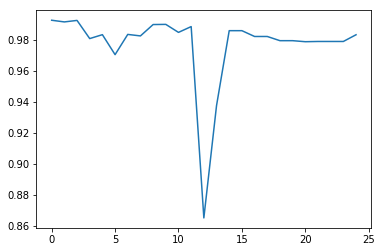

In [15]:
CP(model, index, points,x)

Na wykresie można zauważyć, że dla różnicy wieku między partnerami równej w przybliżeniu 12 lat i przy stałych pozostałych parametrach - występuje spadek prawdopodobieństwa przetrwania związku - jednakże jego poziom pozostaje wciąż wysoki.

## how_long_relationship

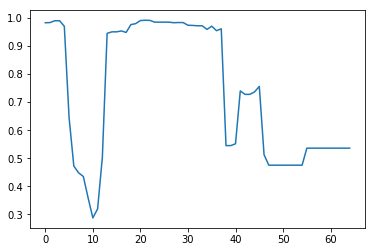

In [18]:
x=X_test.iloc[1:2,:]
index=4
points=np.arange(0, 65, 1)
CP(model, index, points,x)

Z wykresu można odczytać m.in. że dla pary o stażu związku ok 10 lat oraz stałych pozostałych parametrach - jest duża szansa na kryzys w związku.